In [79]:
import pickle
import numpy as np

scenario = "fs_large"
algo = ['ilp', 'soga', 'GA', 'lshade']
file_name = [a + "_" + scenario + ".pkl" for a in algo]
DI_all_algo = []
VAR_all_algo = []
CQ_all_algo = []
ACT_all_algo = []

for algo in file_name:
    with open(algo, 'rb') as f:
        loaded_data = pickle.load(f)
    if algo.startswith('soga'):
        di = loaded_data[0]
        var = loaded_data[1]
        cq = loaded_data[3]
        act = loaded_data[2]
    else:
        di = loaded_data[0]
        var = loaded_data[1]
        cq = loaded_data[2]
        act = loaded_data[3]
    DI_all_algo.append(di)
    VAR_all_algo.append(var)
    CQ_all_algo.append(cq)
    ACT_all_algo.append(act)


In [80]:
len(list(range(6, 180, 5)))

35

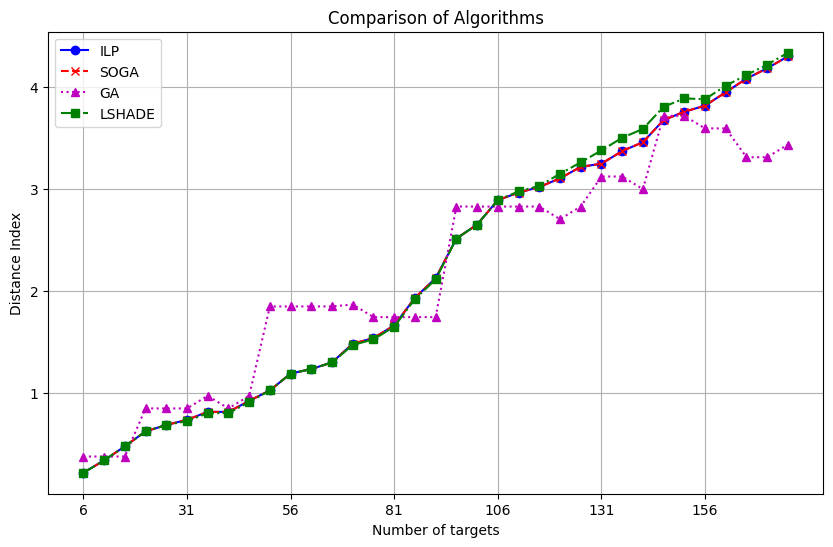

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming DI_avg_all_algo, VAR_avg_all_algo, CQ_avg_all_algo, and ACT_avg_all_algo are already defined

# Calculate the averages
DI_avg_all_algo = []
VAR_avg_all_algo = []
CQ_avg_all_algo = []
ACT_avg_all_algo = []
for i in range(len(DI_all_algo)):
    di_avg = np.mean(DI_all_algo[i], axis=0)
    var_avg = np.mean(VAR_all_algo[i], axis=0)
    cq_avg = np.mean(CQ_all_algo[i], axis=0)
    act_avg = np.mean(ACT_all_algo[i], axis=0)
    DI_avg_all_algo.append(di_avg)
    VAR_avg_all_algo.append(var_avg)
    CQ_avg_all_algo.append(cq_avg)
    ACT_avg_all_algo.append(act_avg)

# Plotting
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
plt.plot(CQ_avg_all_algo[0][::5], label='ILP', linestyle='-', marker='o', color='b')
plt.plot(CQ_avg_all_algo[1][::5], label='SOGA', linestyle='--', marker='x', color='r')
plt.plot(CQ_avg_all_algo[2][::5], label = 'GA', linestyle=':', marker='^', color='m')
plt.plot(CQ_avg_all_algo[3], label='LSHADE', linestyle='-.', marker='s', color='g')
# replace the x-axis with the number of targets
plt.xticks(range(len(DI_avg_all_algo[0][::5])), range(6, 180, 5))
# only xticks at 5 intervals
plt.xticks(range(len(DI_avg_all_algo[0][::5]))[::5], range(6, 180, 25))
# Add axis labels
plt.xlabel('Number of targets')
plt.ylabel('Coverage Quality')

# Add a title
plt.title('Comparison of Algorithms')

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()